In [56]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [57]:
df = pd.read_csv('Sensor Data.csv')

In [58]:
df.head()

,date,Temperature,Light,PIR
0,2025-10-02 14:19:00,23.7000,585.200000,1
1,2025-10-02 14:19:59,23.7180,578.400000,1
2,2025-10-02 14:21:00,23.7300,572.666667,1
3,2025-10-02 14:22:00,23.7225,493.750000,1
4,2025-10-02 14:23:00,23.7540,488.600000,1


In [59]:
filename = 'Sensor Data.csv'
try:
    df = pd.read_csv(filename, parse_dates=['date'])
    df = df.sort_values('date').reset_index(drop=True)

    print("--- Initial Data Health Check ---")
    print(f"Dataset Shape: {df.shape}")
    print("\nFirst 5 Rows:")
    print(df.head())

    print("\nColumn Data Types:")
    print(df.info())

    print("\nMissing Values Per Column:")
    print(df.isnull().sum())

    print("\nDuplicate Timestamps:", df.duplicated(subset=['date']).sum())

except FileNotFoundError:
    print(f"Error: The file '{filename}' was not found. Please make sure it's in the same directory as your script.")
except Exception as e:
    print(f"An error occurred: {e}")


--- Initial Data Health Check ---
Dataset Shape: (17121, 4)

First 5 Rows:
                 date  Temperature       Light  PIR
0 2025-10-02 14:19:00      23.7000  585.200000    1
1 2025-10-02 14:19:00      23.7000  585.200000    1
2 2025-10-02 14:19:59      23.7180  578.400000    1
3 2025-10-02 14:21:00      23.7300  572.666667    1
4 2025-10-02 14:22:00      23.7225  493.750000    1

Column Data Types:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17121 entries, 0 to 17120
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         17121 non-null  datetime64[ns]
 1   Temperature  17121 non-null  float64       
 2   Light        17121 non-null  float64       
 3   PIR          17121 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(1)
memory usage: 535.2 KB
None

Missing Values Per Column:
date           0
Temperature    0
Light          0
PIR            0
dtype: int64

Dupli

In [60]:
print("\n--- Performing Data Cleaning ---")

df.drop_duplicates(subset=['date'], keep='last', inplace=True)

for col in ['Temperature', 'Light', 'PIR']:
    df[col] = pd.to_numeric(df[col], errors='coerce')

for col in ['Temperature', 'Light']:
    q_low, q_high = df[col].quantile([0.01, 0.99])
    df[col] = df[col].clip(q_low, q_high)

df.dropna(inplace=True)
df['PIR'] = df['PIR'].astype(int)

print("Cleaning complete.")
print(f"Dataset Shape after cleaning: {df.shape}")



--- Performing Data Cleaning ---
Cleaning complete.
Dataset Shape after cleaning: (17120, 4)


In [61]:
import numpy as np

print("\n--- Performing Feature Engineering ---")

for w in [3, 5]:
    df[f'Light_mean_{w}'] = df['Light'].rolling(window=w, min_periods=1).mean()
    df[f'Temp_mean_{w}'] = df['Temperature'].rolling(window=w, min_periods=1).mean()
    
    df[f'Light_diff_{w}'] = df['Light'].diff(periods=w)
    df[f'Temp_diff_{w}'] = df['Temperature'].diff(periods=w)

df['hour'] = df['date'].dt.hour + df['date'].dt.minute / 60.0
df['hour_sin'] = np.sin(2 * np.pi * df['hour'] / 24)
df['hour_cos'] = np.cos(2 * np.pi * df['hour'] / 24)

df.drop(columns=['hour'], inplace=True)
df.dropna(inplace=True)
df.reset_index(drop=True, inplace=True)

print("Feature engineering complete.")
print("\nFinal Dataset with new features (first 5 rows):")
print(df.head())



--- Performing Feature Engineering ---
Feature engineering complete.

Final Dataset with new features (first 5 rows):
                 date  Temperature       Light  PIR  Light_mean_3  \
0 2025-10-02 14:23:59       23.760  568.666667    1    517.005556   
1 2025-10-02 14:25:00       23.730  536.333333    1    531.200000   
2 2025-10-02 14:25:59       23.754  509.000000    1    538.000000   
3 2025-10-02 14:26:59       23.754  476.000000    1    507.111111   
4 2025-10-02 14:28:00       23.736  510.000000    1    498.333333   

   Temp_mean_3  Light_diff_3  Temp_diff_3  Light_mean_5  Temp_mean_5  \
0      23.7455     -4.000000       0.0300    540.416667      23.7369   
1      23.7480     42.583333       0.0075    532.003333      23.7393   
2      23.7480     20.400000       0.0000    519.270000      23.7441   
3      23.7460    -92.666667      -0.0060    515.720000      23.7504   
4      23.7480    -26.333333       0.0060    520.000000      23.7468   

   Light_diff_5  Temp_diff_5  hou

Successfully loaded 'Sensor Data.csv'. Ready to generate plots.
Generating distribution plots for Temperature and Light...


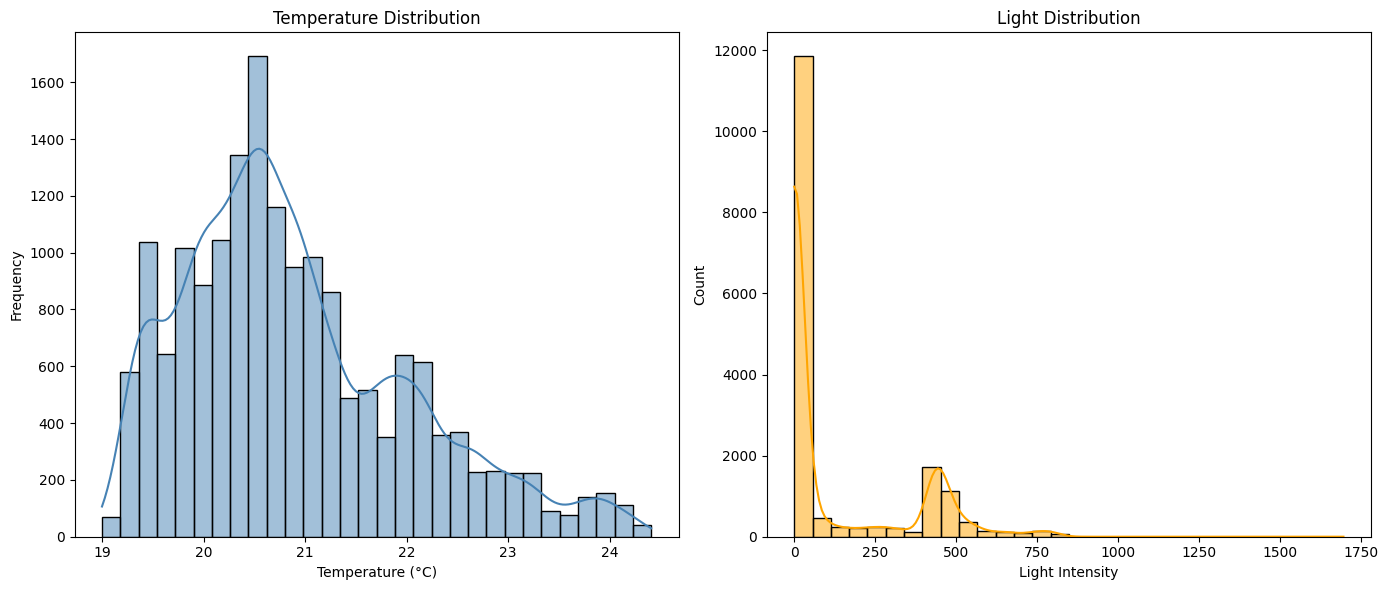


Generating bar chart for PIR class distribution...


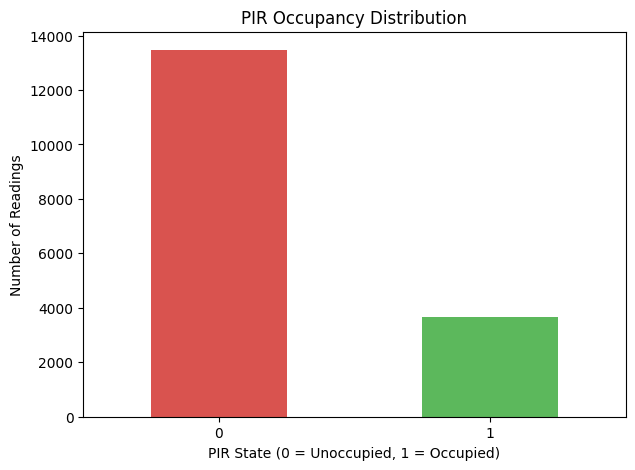


Generating time series plot of sensor readings...


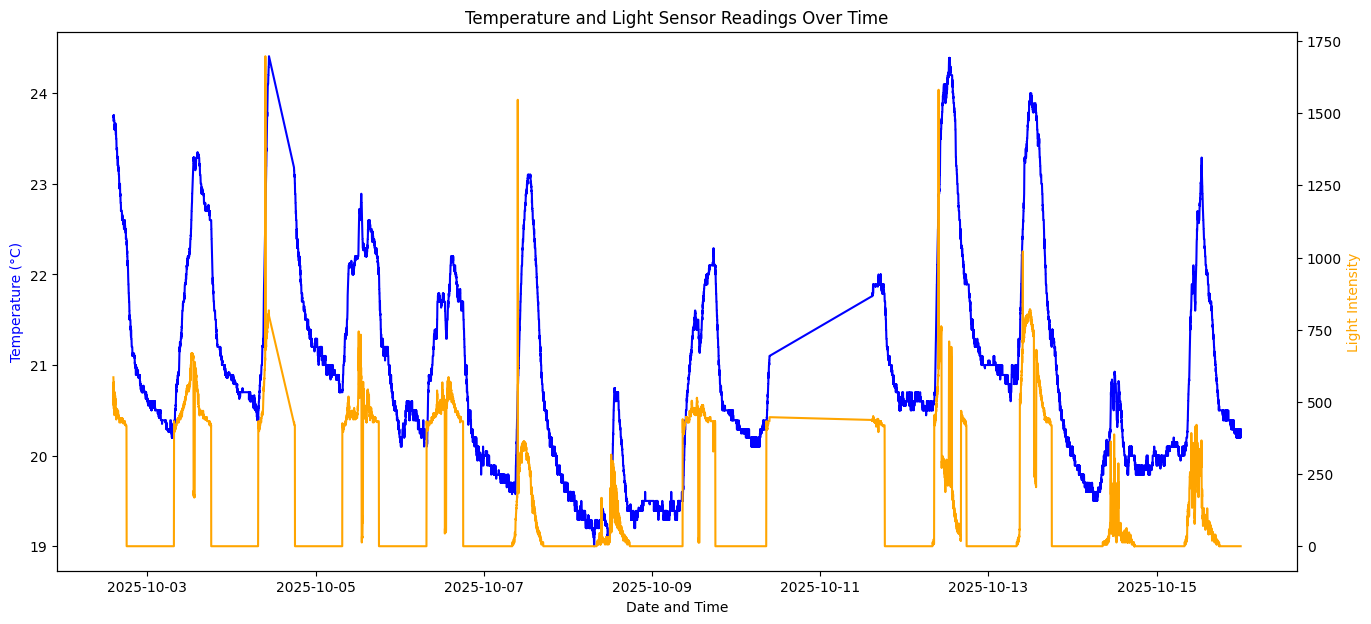


Generating box plots to compare features vs. PIR state...


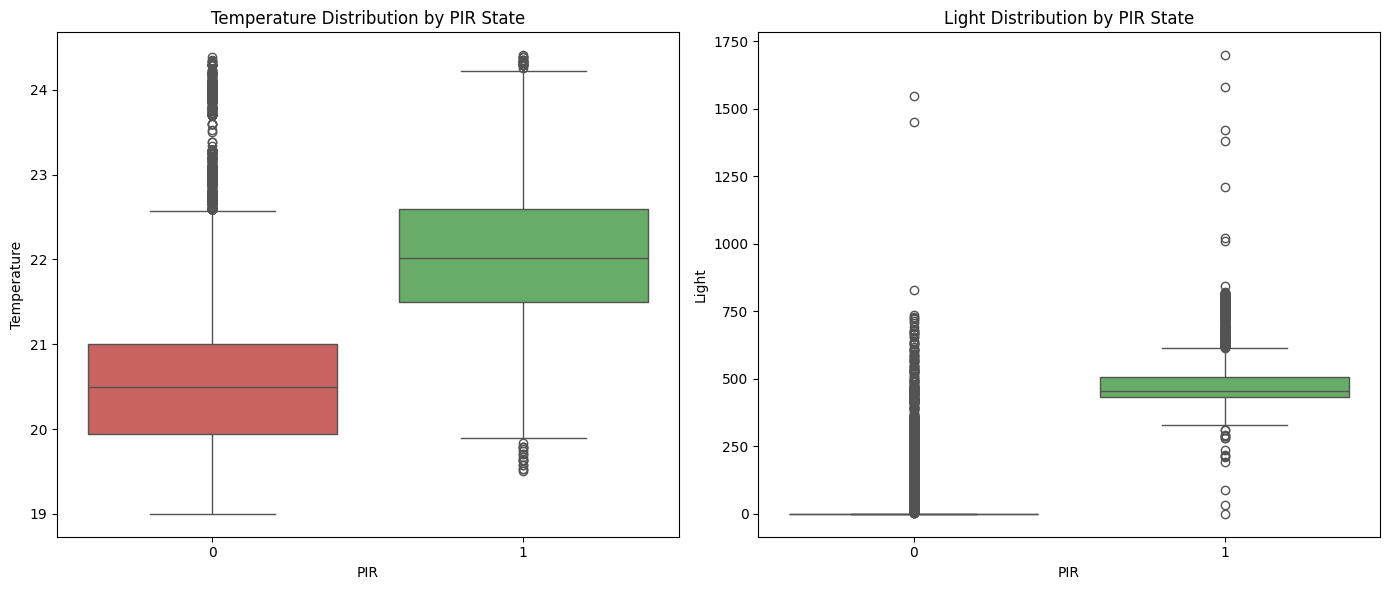

In [63]:

filename = 'Sensor Data.csv'

try:
    df = pd.read_csv(filename, parse_dates=['date'])
    df = df.sort_values('date').reset_index(drop=True)
    print(f"Successfully loaded '{filename}'. Ready to generate plots.")


    print("Generating distribution plots for Temperature and Light...")
    plt.figure(figsize=(14, 6))

    plt.subplot(1, 2, 1)
    sns.histplot(df['Temperature'], bins=30, kde=True, color='steelblue')
    plt.title('Temperature Distribution')
    plt.xlabel('Temperature (°C)')
    plt.ylabel('Frequency')

    plt.subplot(1, 2, 2)
    sns.histplot(df['Light'], bins=30, kde=True, color='orange')
    plt.title('Light Distribution')
    plt.xlabel('Light Intensity')

    plt.tight_layout()
    plt.show()

    print("\nGenerating bar chart for PIR class distribution...")
    plt.figure(figsize=(7, 5))
    pir_counts = df['PIR'].value_counts().sort_index()
    pir_counts.plot(kind='bar', color=['#d9534f', '#5cb85c']) 
    plt.title('PIR Occupancy Distribution')
    plt.xlabel('PIR State (0 = Unoccupied, 1 = Occupied)')
    plt.ylabel('Number of Readings')
    plt.xticks(rotation=0) 
    plt.show()

    print("\nGenerating time series plot of sensor readings...")
    plt.figure(figsize=(16, 7))
    
    ax1 = plt.gca() 
    ax2 = ax1.twinx() 

    ax1.plot(df['date'], df['Temperature'], color='blue', label='Temperature')
    ax2.plot(df['date'], df['Light'], color='orange', label='Light')

    ax1.set_xlabel('Date and Time')
    ax1.set_ylabel('Temperature (°C)', color='blue')
    ax2.set_ylabel('Light Intensity', color='orange')
    ax1.set_title('Temperature and Light Sensor Readings Over Time')
    plt.show()

    print("\nGenerating box plots to compare features vs. PIR state...")
    plt.figure(figsize=(14, 6))

    plt.subplot(1, 2, 1)
    sns.boxplot(x='PIR', y='Temperature',hue='PIR',legend=False, data=df, palette=['#d9534f', '#5cb85c'])
    plt.title('Temperature Distribution by PIR State')

    plt.subplot(1, 2, 2)
    sns.boxplot(x='PIR', y='Light',hue='PIR',legend=False, data=df, palette=['#d9534f', '#5cb85c'])
    plt.title('Light Distribution by PIR State')

    plt.tight_layout()
    plt.show()


except FileNotFoundError:
    print(f"Error: The file '{filename}' was not found.")
except Exception as e:
    print(f"An unexpected error occurred: {e}")

